In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker

In [2]:
in_file = 'crp_sites.fasta'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs_crp = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
print('We have %d WW domain seqs'%len(seqs_crp))

# Convert seuqenes to weight matrix
weight_df = logomaker.alignment_to_matrix(seqs_crp, to_type='weight')

# preview weight matrix
weight_df.head()

We have 358 WW domain seqs


,A,C,G,T
0,0.566243,-0.455452,-0.310021,-0.024112
1,0.709607,-0.945257,-0.617203,0.255042
2,0.883858,-1.744958,-1.214444,0.511381
3,0.866476,-1.641865,-1.040414,0.454350
4,0.566243,-0.976284,-0.914883,0.566243


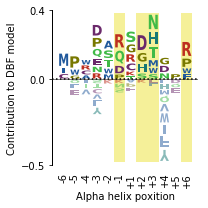

In [3]:
#logomaker.get_fontnames()
mat_df = pd.read_csv('DBF.logo.txt',delim_whitespace=True, index_col=0)
mat_df.reset_index(inplace=True, drop=True)
mat_df.head()

# Floor out low values
mat_df[abs(mat_df) < .02] = 0

colors = {'DEC': [.42, .16, .42],
           'PG': [.47, .47, 0.0],
      'MIWALFV': [.13, .35, .61],
         'NTSQ': [.25, .73, .28],
           'RK': [.74, .18, .12],
           'HY': [.09, .47, .46]}

highlight_color = [.96, .94, .60]

fig, ax = plt.subplots(figsize=[3,3])

logo = logomaker.Logo(mat_df, 
                     ax=ax, 
                     colors=colors,
                     vpad=.2,
                     width=.8)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True)
logo.style_glyphs_below(fade=.5)
ax.axhline(0,linestyle=':',color='k')

logo.highlight_position(5, color=highlight_color)
logo.highlight_position(7, color=highlight_color)
logo.highlight_position(8, color=highlight_color)
logo.highlight_position(11, color=highlight_color)


# Style axes
ylim = [-.5,+.4]
ax.set_ylim(ylim)
xticks = range(len(mat_df))
xticklabels = ['%+d'%x for x in  list(range(-6,0))+list(range(1,7))]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_yticks([ylim[0], 0, ylim[1]])
ax.set_xlim([-1,len(mat_df)])
ax.xaxis.set_tick_params(width=0)

ax.set_xlabel('Alpha helix poxition')
ax.set_ylabel('Contribution to DBF model')

fig.tight_layout()

In [4]:
# Load data
data_df = pd.read_excel('Janganathan2018_Fig1D.xlsx')
data_df.tail()

# Get motif length
L = len(data_df)

# Get exon bounds
exon_indices = data_df['exon']
indices = data_df.index
exon_start = min(indices[exon_indices])
exon_stop = max(indices[exon_indices])

# Create matrix
bases = 'ACGT'
C = len(bases)
mat_df = pd.DataFrame(index=range(L),columns=list(bases),data=0)
for p in data_df.index:
    c = data_df.loc[p,'base']
    v = data_df.loc[p,'value']
    mat_df.loc[p,c] = v
    
# Preview matrix
mat_df.head()

,A,C,G,T
0,0.064469,0.000000,0.0,0.000000
1,0.000000,0.119156,0.0,0.000000
2,0.000000,0.000000,0.0,0.288562
3,0.167969,0.000000,0.0,0.000000
4,0.159656,0.000000,0.0,0.000000


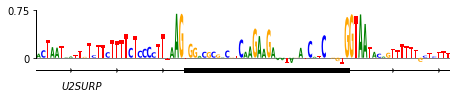

In [5]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

logo = logomaker.Logo(mat_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True,bounds=[0,.75])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.5,.75])
ax.set_xticks([])

# Draw gene
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,L,10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')

# Draw gene name
ax.text(5,-.5,'U2SURP', fontstyle='italic')

# Draw exon
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

# Tight layout
plt.tight_layout()

We have 4025 WW domain seqs


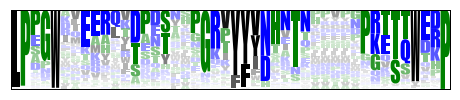

In [6]:
in_file = 'Pfam_wwdomain.fa'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
print('We have %d WW domain seqs'%len(seqs))
seqs[:10]
counts_df = logomaker.alignment_to_matrix(seqs,to_type='counts',characters_to_ignore='.-X')

fig, ax = plt.subplots(figsize=[6.5,1.5])

prob_mat = logomaker.transform_matrix(counts_df, from_type='counts', to_type='probability')
logo = logomaker.Logo(prob_mat, font_name='Impact', ax=ax,draw_now=False)
logo.fade_glyphs_in_probability_logo(v_alpha0=0.0,v_alpha1=0.25,ax=ax)
#logo.style_spines(spines=['top','bottom'], visible=True)
logo.style_spines(visible=True)
ax.set_yticks([])
ax.set_xticks([])

# Tight layout
plt.tight_layout()

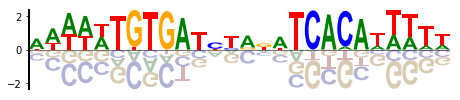

In [7]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

# Create counts matrix
logo = logomaker.Logo(weight_df, 
                      ax=ax, 
                      center_values=True, 
                      fade_below=.7,
                      shade_below=.5,
                      font_name='Arial')

# Style axes
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], linewidth=2)
ax.set_xticks([])
#ax.set_yticks([])

# Tight layout
plt.tight_layout()

# Save as pdf
#out_file = 'Example_CRP.pdf'
#fig.savefig(out_file)
#print('Done! Output written to %s.'%out_file)

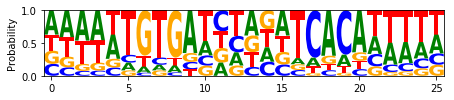

In [8]:
fig, ax = plt.subplots(figsize=[6.5,1.5])


# Counts matrix -> Probability matrix

prob_mat2 = logomaker.alignment_to_matrix(seqs_crp, to_type='probability')

logomaker.Logo(prob_mat2,figsize=[6.5,1.5],ax=ax)
ax.set_ylabel('Probability')

plt.tight_layout()

#out_file = 'Example_CRP_prob.pdf'
#fig.savefig(out_file)
#print('Done! Output written to %s.'%out_file)

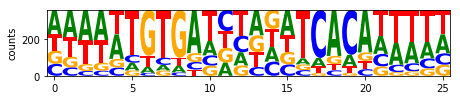

In [9]:
fig, ax = plt.subplots(figsize=[6.5,1.5])


# Counts matrix -> Probability matrix

counts = logomaker.alignment_to_matrix(seqs_crp, to_type='counts')

logomaker.Logo(counts,figsize=[6.5,1.5],ax=ax)
ax.set_ylabel('counts')

plt.tight_layout()

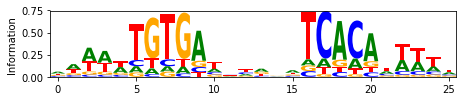

In [10]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

# Counts matrix -> Probability matrix
counts_df_crp = logomaker.alignment_to_matrix(seqs_crp, to_type='counts')
info_mat = logomaker.transform_matrix(counts_df_crp, 
                                      from_type='counts', 
                                      to_type='information')

logomaker.Logo(info_mat,figsize=[6.5,1.5],ax=ax)
ax.set_ylabel('Information')

plt.tight_layout()

#out_file = 'Example_CRP_info.pdf'
#fig.savefig(out_file)
#print('Done! Output written to %s.'%out_file)

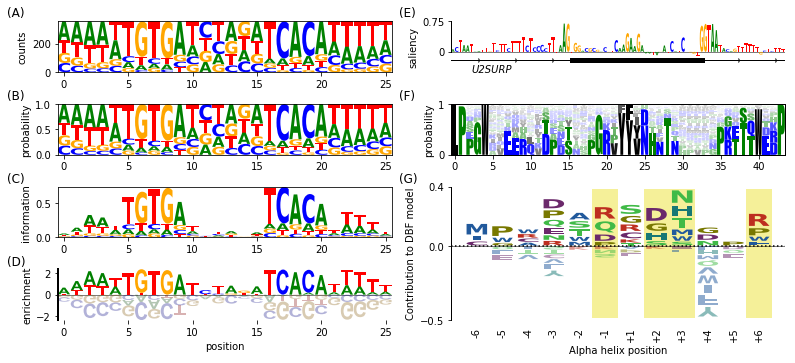

In [11]:
plt.subplots(figsize=[11,5])

# heat map
ax00 = plt.subplot2grid((4, 2), (0, 0), colspan=1)
#sns.heatmap(counts_df_crp.T,cmap='RdBu_r',ax=ax00,cbar=False)

counts = logomaker.alignment_to_matrix(seqs_crp, to_type='counts')
counts_logo = logomaker.Logo(counts,figsize=[6.5,1.5],ax=ax00)
ax00.set_ylabel('counts')

# ww_domain
ax01 = plt.subplot2grid((4, 2), (1, 1), colspan=1)

prob_mat = logomaker.transform_matrix(counts_df, from_type='counts', to_type='probability')
logo = logomaker.Logo(prob_mat, font_name='Impact', ax=ax,draw_now=False,stack_order='small_on_top')
logo.fade_glyphs_in_probability_logo(v_alpha0=0.0,v_alpha1=0.25,ax=ax01)
#logo.style_spines(spines=['top','bottom'], visible=True)
logo.style_spines(visible=True)
#ax01.set_yticks([])
#ax01.set_xticks([])
ax01.set_ylabel('probability')



# prob mat
ax10 = plt.subplot2grid((4, 2), (1, 0), colspan=1)
logomaker.Logo(prob_mat2,ax=ax10)
ax10.set_ylabel('probability')

# saliency
ax11 = plt.subplot2grid((4, 2), (0, 1))

data_df = pd.read_excel('Janganathan2018_Fig1D.xlsx')
data_df.tail()

# Get motif length
L = len(data_df)

# Get exon bounds
exon_indices = data_df['exon']
indices = data_df.index
exon_start = min(indices[exon_indices])
exon_stop = max(indices[exon_indices])

# Create matrix
bases = 'ACGT'
C = len(bases)
mat_df = pd.DataFrame(index=range(L),columns=list(bases),data=0)
for p in data_df.index:
    c = data_df.loc[p,'base']
    v = data_df.loc[p,'value']
    mat_df.loc[p,c] = v



logo = logomaker.Logo(mat_df, ax=ax11)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True,bounds=[0,.75])
ax11.set_yticks([0,.75])
ax11.set_yticklabels(['0','0.75'])
ax11.set_ylim([-.5,.75])
ax11.set_xticks([])

# Draw gene
y = -.2
ax11.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,L,10)
ys = y*np.ones(len(xs))
ax11.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')

# Draw gene name
ax11.text(5,-.5,'U2SURP', fontstyle='italic')

# Draw exon
ax11.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

ax11.set_ylabel('saliency')
# Tight layout
#plt.tight_layout()    
    
# end saliency

# info mat
ax20 = plt.subplot2grid((4, 2), (2, 0))
logomaker.Logo(info_mat,ax=ax20)
ax20.set_ylabel('information')

# najafi
ax21 = plt.subplot2grid((4, 2), (2, 1), rowspan=2)

#logomaker.get_fontnames()
mat_df = pd.read_csv('DBF.logo.txt',delim_whitespace=True, index_col=0)
mat_df.reset_index(inplace=True, drop=True)
mat_df.head()

# Floor out low values
mat_df[abs(mat_df) < .02] = 0

colors = {'DEC': [.42, .16, .42],
           'PG': [.47, .47, 0.0],
      'MIWALFV': [.13, .35, .61],
         'NTSQ': [.25, .73, .28],
           'RK': [.74, .18, .12],
           'HY': [.09, .47, .46]}

highlight_color = [.96, .94, .60]

logo = logomaker.Logo(mat_df, 
                     ax=ax21, 
                     colors=colors,
                     vpad=.2,
                     width=.8)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True)
logo.style_glyphs_below(fade=.5)
ax21.axhline(0,linestyle=':',color='k')

logo.highlight_position(5, color=highlight_color)
logo.highlight_position(7, color=highlight_color)
logo.highlight_position(8, color=highlight_color)
logo.highlight_position(11, color=highlight_color)

# Style axes
ylim = [-.5,+.4]
ax21.set_ylim(ylim)
xticks = range(len(mat_df))
xticklabels = ['%+d'%x for x in  list(range(-6,0))+list(range(1,7))]
ax21.set_xticks(xticks)
ax21.set_xticklabels(xticklabels, rotation=90)
ax21.set_yticks([ylim[0], 0, ylim[1]])
ax21.set_xlim([-1,len(mat_df)])
ax21.xaxis.set_tick_params(width=0)

ax21.set_xlabel('Alpha helix position')
ax21.set_ylabel('Contribution to DBF model')

ax30 = plt.subplot2grid((4, 2), (3, 0), colspan=1)
logo = logomaker.Logo(weight_df, 
                      ax=ax30, 
                      center_values=True, 
                      fade_below=.7,
                      shade_below=.5,
                      font_name='Arial')

ax30.set_ylabel('enrichment')
ax30.set_xlabel('position')

# Style axes
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], linewidth=2)
#ax30.set_xticks([])

# Tight layout
panel_label_size=12
plt.figtext(0,1.0,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(0,0.77,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(0,0.54,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(0,0.31,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')

plt.figtext(0.495,1.0,'(E)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(0.495,0.77,'(F)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(0.495,0.54,'(G)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')



#ax12 = plt.subplot2grid((4, 2), (1, 2), rowspan=2)

#ax21 = plt.subplot2grid((4, 2), (2, 1))
plt.tight_layout()
plt.savefig('Figure1.pdf')

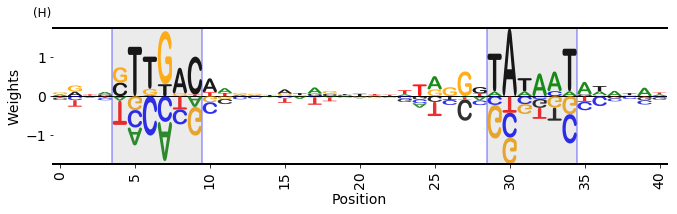

In [12]:
df_rnap_41 = pd.read_csv('../data/rnap_tau_final_all.41.matrix.txt', delim_whitespace=True)
# Create a BaseLogo
logo = logomaker.Logo(df=-df_rnap_41,
                      #negate_values=True,
                      figsize = (11,2.5),
                      center_values=True,draw_now=False)

# Style glyphs
logo.style_glyphs(alpha=.9,
                  #color='gray',
                  font_family='Arial Rounded MT Bold',draw_now=False)

# Add below effects
logo.style_glyphs_below(shade=.1, fade=.1,draw_now=False)

# Modify a single glyph
logo.style_single_glyph(p=30, c='A', color='gray')

# Highlight wt sequence
wt_seq = 'CAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
#wt_seq1 = 'CCGG'
logo.style_glyphs_in_sequence(wt_seq, 
                              #edgewidth=1.0, 
                              #alpha=0.5, 
                              color='black'
                             )

# Draw a baseline
logo.draw_baseline(linewidth=1)

# Style xticks
logo.style_xticks(spacing=5, anchor=25, rotation=90, fmt='%d')
plt.tick_params(labelsize=14)
plt.ylabel('Weights',fontsize=14)
plt.xlabel('Position',fontsize=14)

# Style spines
#plt.tight_layout()
logo.style_spines(visible=False)
logo.style_spines(visible=True, spines=('top', 'bottom'), linewidth=2)
logo.highlight_position_range(4,9, edgecolor='b', linewidth=2, color='silver', alpha=.3)
logo.highlight_position_range(29,34, edgecolor='b', linewidth=2, color='silver', alpha=.3)
plt.figtext(0.1,1.0,'(H)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.savefig('Figure1_1.pdf')
# highlight position